In [2]:
# Enter your code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


def calcVariance(patch):
    x = cv2.Scharr(patch, -1, 1, 0)
    y = cv2.Scharr(patch, -1, 0, 1)

    return np.abs(x) + np.abs(y)


def displayZoomed(fragment, wndName, wndTitle=None):
    size = (400, 400)
    resizedFragment = cv2.resize(fragment, size)
    if wndTitle != None:
        cv2.setWindowTitle(wndName, wndTitle)
    cv2.imshow(wndName, resizedFragment)

def getPatch(xy, img):
    patch = img[xy[1] - 15:xy[1] + 15, xy[0] - 15:xy[0] + 15]
    return patch

def pickBestAround(xy, values, image):
    bestV = 0
    best_xy = None
    for move in np.array([(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]) * 30:
        xy_m = xy + move
        if xy_m[xy_m<0].sum() < 0:
            continue
        patch = getPatch(xy_m, values)
        variance = 1/calcVariance(patch).sum()
        if variance > bestV:
            bestV = variance
            best_xy = xy_m

        return getPatch(best_xy, values), getPatch(best_xy, image)

def onMouse(action, x, y, flags, img):
    if action == cv2.EVENT_LBUTTONDOWN or action == cv2.EVENT_RBUTTONDOWN:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 0]

        # pick the best patch and display it
        (grayPatch, colorPatch) = pickBestAround((x, y), gray, img)
        
        # seamless clone the patch onto the image
        src_mask = np.ones_like(grayPatch) * 255
        cv2.seamlessClone(
            colorPatch, img, src_mask, (x, y), cv2.NORMAL_CLONE, blend=img)

    if action == cv2.EVENT_RBUTTONDOWN:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 0]
        # display the selected area
        patch, cpatch = getPatch((x,y), gray), getPatch((x,y), img)

        # pick the best patch and display it
        (grayPatch, colorPatch) = pickBestAround((x, y), gray, img)

        variance = calcVariance(patch)
        displayZoomed(cpatch, "Variance",
                    "Patch {0}".format(np.sum(variance)))
        variance = calcVariance(grayPatch)
        displayZoomed(colorPatch, "Best Patch",
                    "Best Patch V={0}".format(np.sum(variance)))

img = cv2.imread("blemish.png", 1)
# Make a dummy image, will be useful to clear the drawing
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", onMouse, img)

k = 0
while k != 27:
    cv2.imshow("Window", img)
    k = cv2.waitKey(20)

cv2.destroyAllWindows()

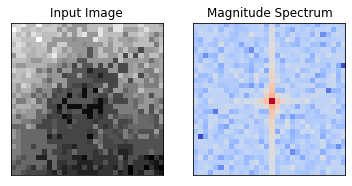

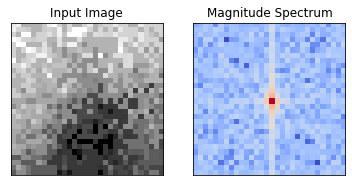

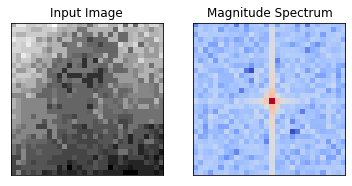

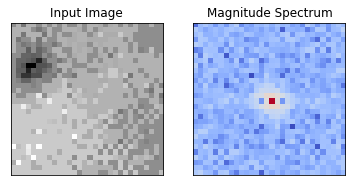

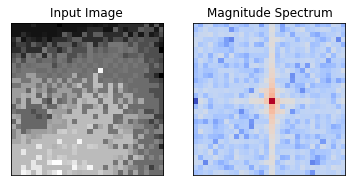

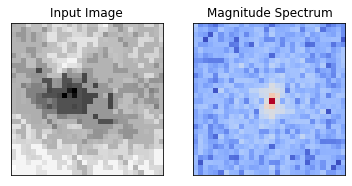

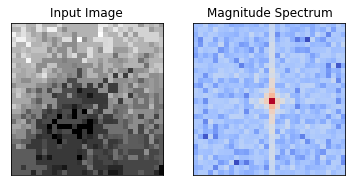

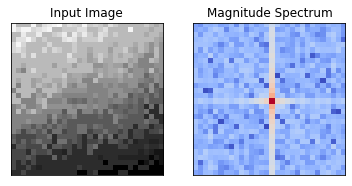

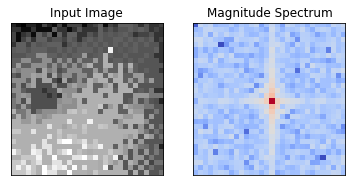

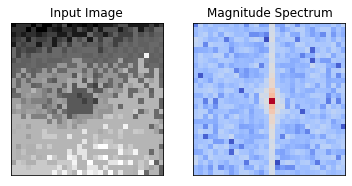

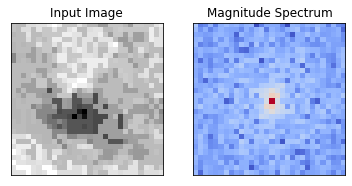

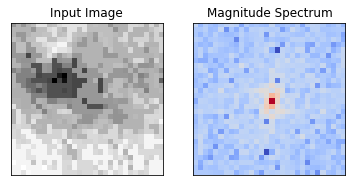

In [3]:
# Enter your code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def magSpectrum(patch):
    f = np.fft.fft2(patch)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    return magnitude_spectrum

def displayZoomed(wndName, fragment, wndTitle = None):
    size = (400,400)
    resizedFragment = cv2.resize(fragment, size)
    if wndTitle != None:
            cv2.setWindowTitle(wndName, wndTitle)
    cv2.imshow(wndName, resizedFragment)

def onMouse(action, x, y, flags, userdata): 
    if action==cv2.EVENT_LBUTTONDOWN:
        # Mark the center
        img = userdata[y-15:y+15,x-15:x+15]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        magnitude_spectrum = magSpectrum(img)
        
        plt.subplot(121),plt.imshow(img, cmap = 'gray')
        plt.title('Input Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'coolwarm')
        plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
        plt.show()


source = cv2.imread("blemish.png",1)
# Make a dummy image, will be useful to clear the drawing
dummy = source.copy()
cv2.namedWindow("Window")
cv2.namedWindow("patch")
cv2.namedWindow("Variance")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", onMouse, source)
k = 0
# loop until escape character is pressed
while k!=27 :
  cv2.imshow("Window", source)
  k = cv2.waitKey(20) & 0xFF
  # Another way of cloning
  if k==99:
    source= dummy.copy()


cv2.destroyAllWindows()

In [1]:
# Enter your code here
# Enter your code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


def calcVariance(patch):
    x = cv2.Scharr(patch, -1, 1, 0)
    y = cv2.Scharr(patch, -1, 0, 1)

    return np.abs(x) + np.abs(y)


def displayZoomed(fragment, wndName, wndTitle=None):
    size = (400, 400)
    resizedFragment = cv2.resize(fragment, size)
    if wndTitle != None:
        cv2.setWindowTitle(wndName, wndTitle)
    cv2.imshow(wndName, resizedFragment)

def getPatch(xy, img):
    patch = img[xy[1] - 15:xy[1] + 15, xy[0] - 15:xy[0] + 15]
    return patch

def pickBestAround(xy, values, image):
    bestV = 0
    best_xy = None
    for move in np.array([(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]) * 30:
        xy_m = xy + move
        if xy_m[xy_m<0].sum() < 0:
            continue
        patch = getPatch(xy_m, values)
        variance = 1/calcVariance(patch).sum()
        if variance > bestV:
            bestV = variance
            best_xy = xy_m

        return getPatch(best_xy, values), getPatch(best_xy, image)

def onMouse(action, x, y, flags, img):
    if action == cv2.EVENT_LBUTTONDOWN or action == cv2.EVENT_RBUTTONDOWN:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 0]

        # pick the best patch and display it
        (grayPatch, colorPatch) = pickBestAround((x, y), gray, img)
        
        # seamless clone the patch onto the image
        src_mask = np.ones_like(grayPatch) * 255
        cv2.seamlessClone(
            colorPatch, img, src_mask, (x, y), cv2.NORMAL_CLONE, blend=img)

    if action == cv2.EVENT_RBUTTONDOWN:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 0]
        # display the selected area
        patch, cpatch = getPatch((x,y), gray), getPatch((x,y), img)

        # pick the best patch and display it
        (grayPatch, colorPatch) = pickBestAround((x, y), gray, img)

        variance = calcVariance(patch)
        displayZoomed(cpatch, "Variance",
                    "Patch {0}".format(np.sum(variance)))
        variance = calcVariance(grayPatch)
        displayZoomed(colorPatch, "Best Patch",
                    "Best Patch V={0}".format(np.sum(variance)))

img = cv2.imread("blemish.png", 1)
# Make a dummy image, will be useful to clear the drawing
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", onMouse, img)

k = 0
while k != 27:
    cv2.imshow("Window", img)
    k = cv2.waitKey(20)

cv2.destroyAllWindows()